In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_regression 

train_x, train_y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 


In [3]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.ones(1))
b = tf.Variable(tf.ones(1))

Y_ = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_mean(tf.square(Y_ - Y))
training_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

train_y = train_y.reshape(100, 1)
print(train_y.shape)

(100, 1)


In [4]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(1000):
    sess.run(training_step, feed_dict={X:train_x, Y:train_y})
    

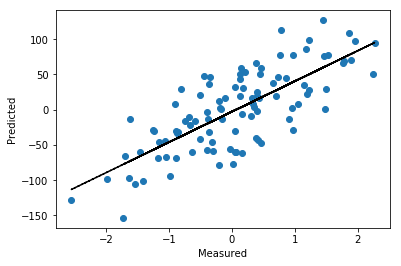

In [5]:
pred = sess.run(Y_, feed_dict={X: train_x})

fig, ax = plt.subplots()
ax.scatter(train_x, train_y)
ax.plot(train_x, pred, 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

(100, 2)
(100,)


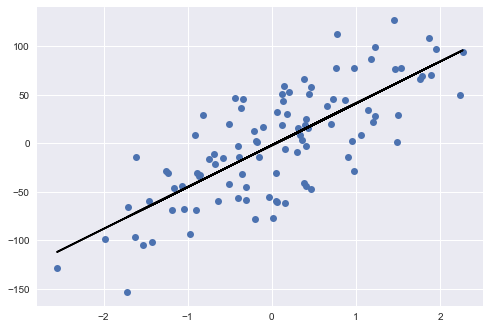

In [7]:
# implement Linear Regression
from sklearn.datasets.samples_generator import make_regression 

x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
x = np.c_[ np.ones(100), x] 

theta = np.ones(2)
# print(theta.shape,x.shape)
# print(theta)
print(x.shape)
print(y.shape)

alpha = 0.01
iterator = 10000
for it in range(iterator):
    h = np.dot(x,theta)
    loss = h - y
    J = np.sum(loss ** 2) // (2*100)
    gradient = np.dot(loss, x) // 100
    theta -= alpha * gradient
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
plt.plot(x[:,1],y,'o')
plt.plot(x,y_predict,'k-')
plt.show()